# Diabetes Prediction Model

#### **Importing Necessary Libraries**

In [1]:
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

#### **Load the data**

In [2]:
df = pd.read_csv(r'diabetes.csv') 
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

#### column list of the dataframe

In [3]:
df.columns.tolist()  #column list of the dataframe

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## Exploratory Data Analysis & Data Cleaning

#### **checking the datatypes**

In [4]:
df.dtypes   #the dataset contains continuous/ numeric data

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

#### Checking null and missing values

In [6]:
df.isnull().any() #checking null values

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
df.isna().any()  #checking NaN/ missing values

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Univariate Analysis: Measures of the Central tendency and the Dispersion

In [8]:
df.describe() #shows more informations with statistical data

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Count plot & Histograms 

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

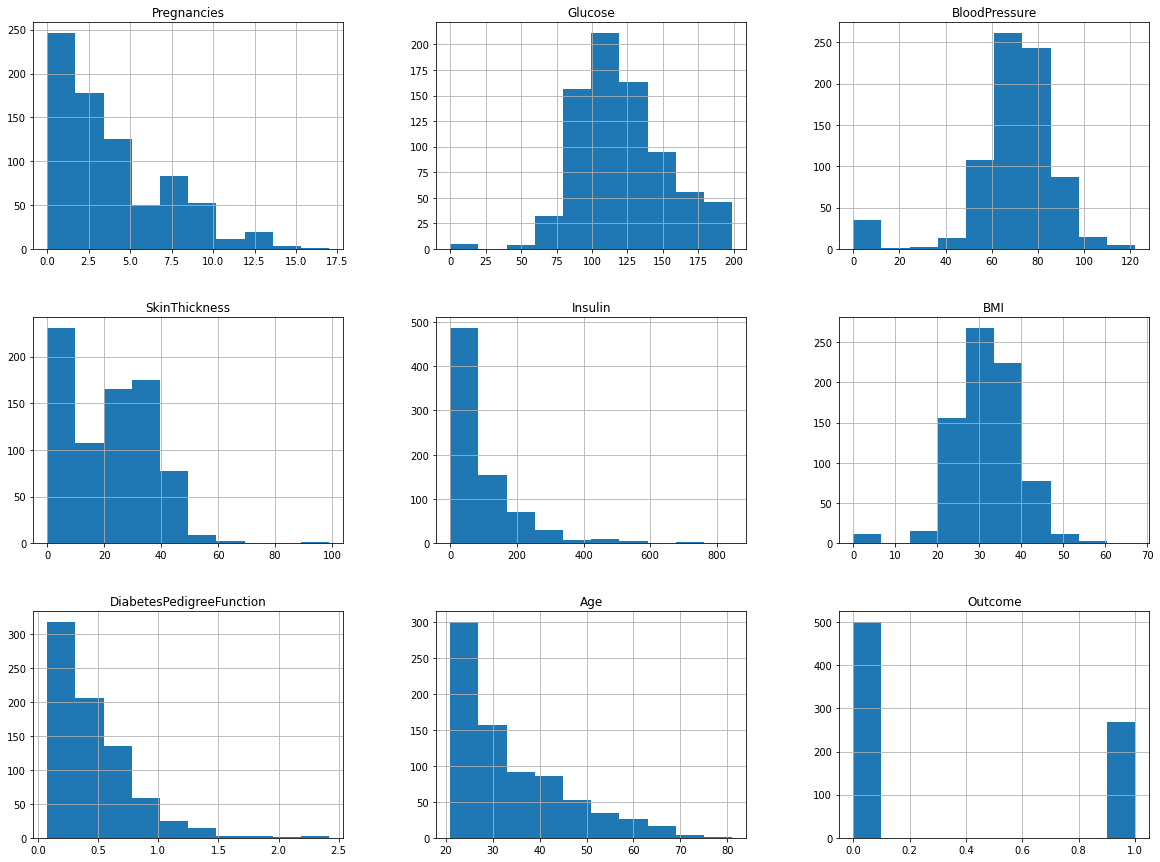

In [9]:
df.hist(figsize=(20,15))

#### Number of Pregnancies vs Outcome

In [10]:
sns.countplot(df["Pregnancies"], hue = df["Outcome"])
plt.title('Number of Pregnancies vs Outcome')

C:\Users\sunan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Pregnancies vs Outcome')

In [11]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Pregnancies", hue = "Outcome",data=df, kde = True,palette="ch:s=.25,rot=-.25")

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

##### Glucose vs Outcome

C:\Users\sunan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Glucose vs Outcome')

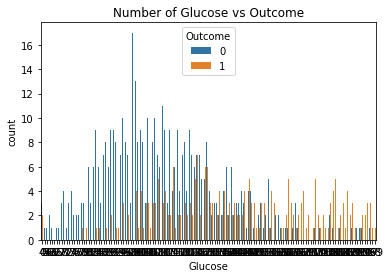

In [12]:
sns.countplot(df["Glucose"], hue = df["Outcome"])
plt.title('Number of Glucose vs Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

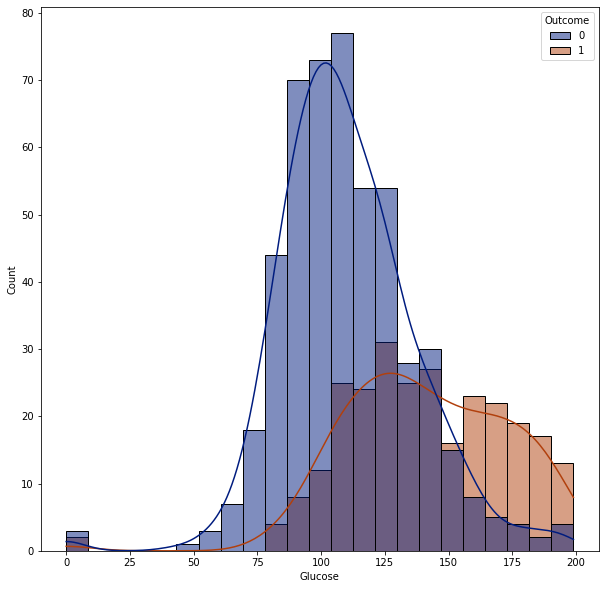

In [13]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Glucose", hue = "Outcome",data=df, kde = True,palette = "dark")

#### BloodPressure vs Outcome

In [14]:
plt.figure(figsize = (10,10))
sns.histplot(x ="BloodPressure", hue = "Outcome",data=df, kde = True,palette = "flare")

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

#### SkinThickness vs Outcome

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

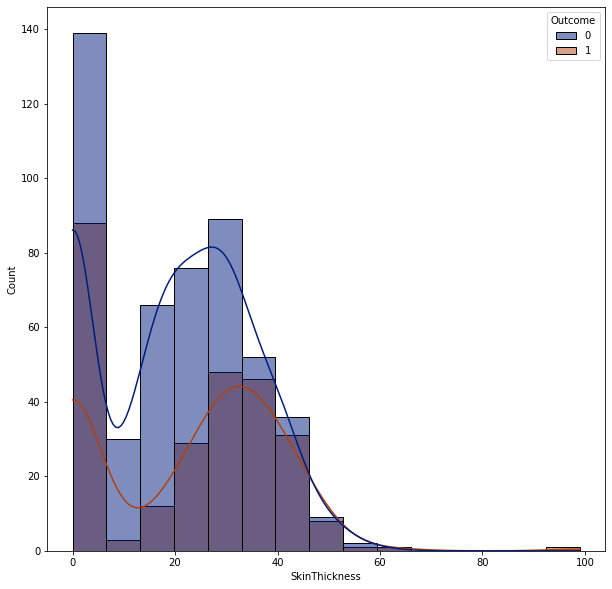

In [15]:
plt.figure(figsize = (10,10))
sns.histplot(x ="SkinThickness", hue = "Outcome",data=df, kde = True,palette="dark")

#### Insulin vs Outcome

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

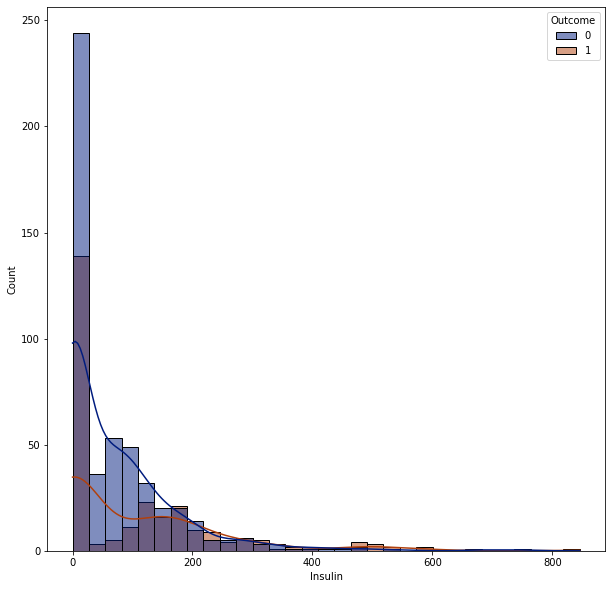

In [16]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Insulin", hue = "Outcome",data=df, kde = True, palette="dark")

#### BMI vs Outcome

<AxesSubplot:xlabel='BMI', ylabel='Count'>

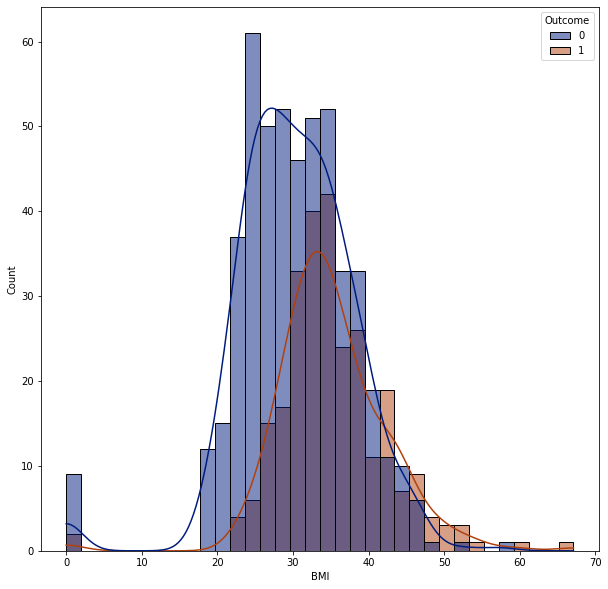

In [17]:
plt.figure(figsize = (10,10))
sns.histplot(x ="BMI", hue = "Outcome",data=df, kde = True, palette="dark")

#### Age vs Outcome

<AxesSubplot:xlabel='Age', ylabel='Count'>

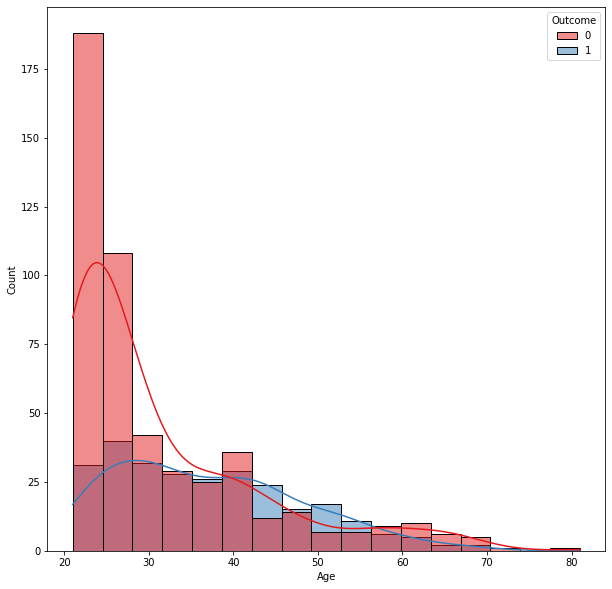

In [18]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Age", hue = "Outcome",data=df, kde = True,palette="Set1")

## Bivariate Analysis : Finding relationship between two independent variables

#### Checking Multicolinearity

#### Age & Bloodpressure

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

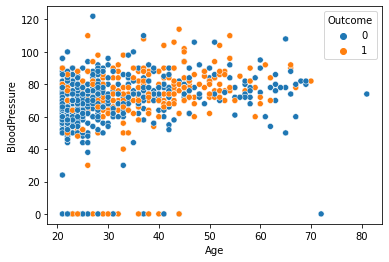

In [19]:
sns.scatterplot(data=df, x="Age", y="BloodPressure",hue = "Outcome")

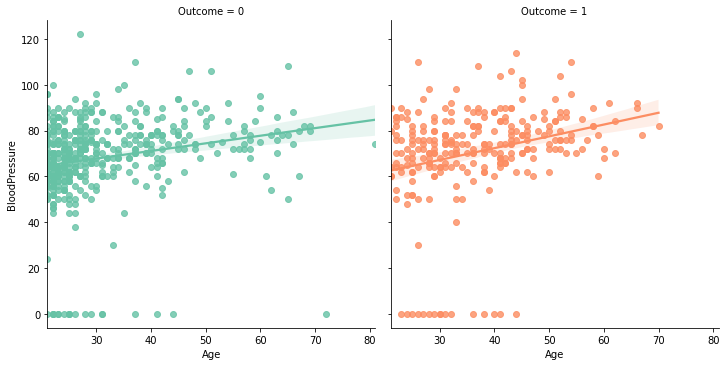

In [20]:
sns.lmplot(data=df, x="Age", y="BloodPressure",hue = "Outcome",palette="Set2",col = "Outcome")

#### Age and Glucose Level

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

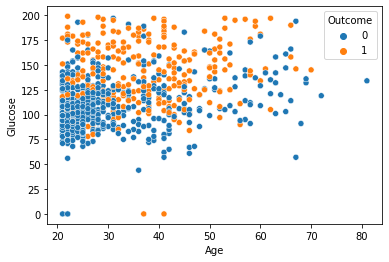

In [21]:
sns.scatterplot(data=df, x="Age", y="Glucose",hue = "Outcome")

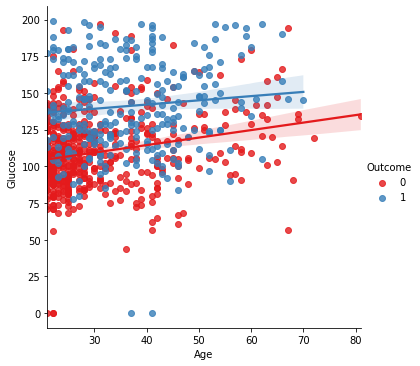

In [22]:
sns.lmplot(data=df, x="Age", y="Glucose",hue = "Outcome",palette="Set1")

#### Age and Skin thickness

<AxesSubplot:xlabel='Age', ylabel='SkinThickness'>

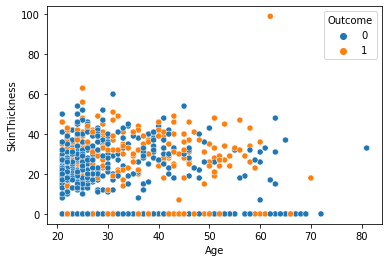

In [23]:
sns.scatterplot(data=df, x="Age", y="SkinThickness",hue = "Outcome")

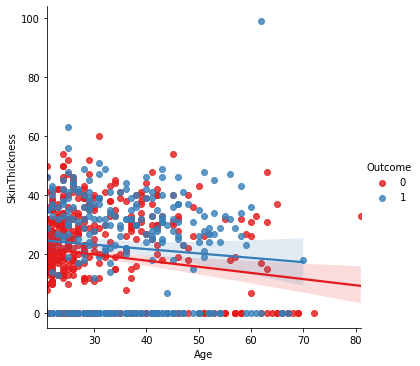

In [24]:
sns.lmplot(data=df, x="Age", y="SkinThickness",hue = "Outcome",palette="Set1")

#### Pairplot

<Figure size 1440x1440 with 0 Axes>

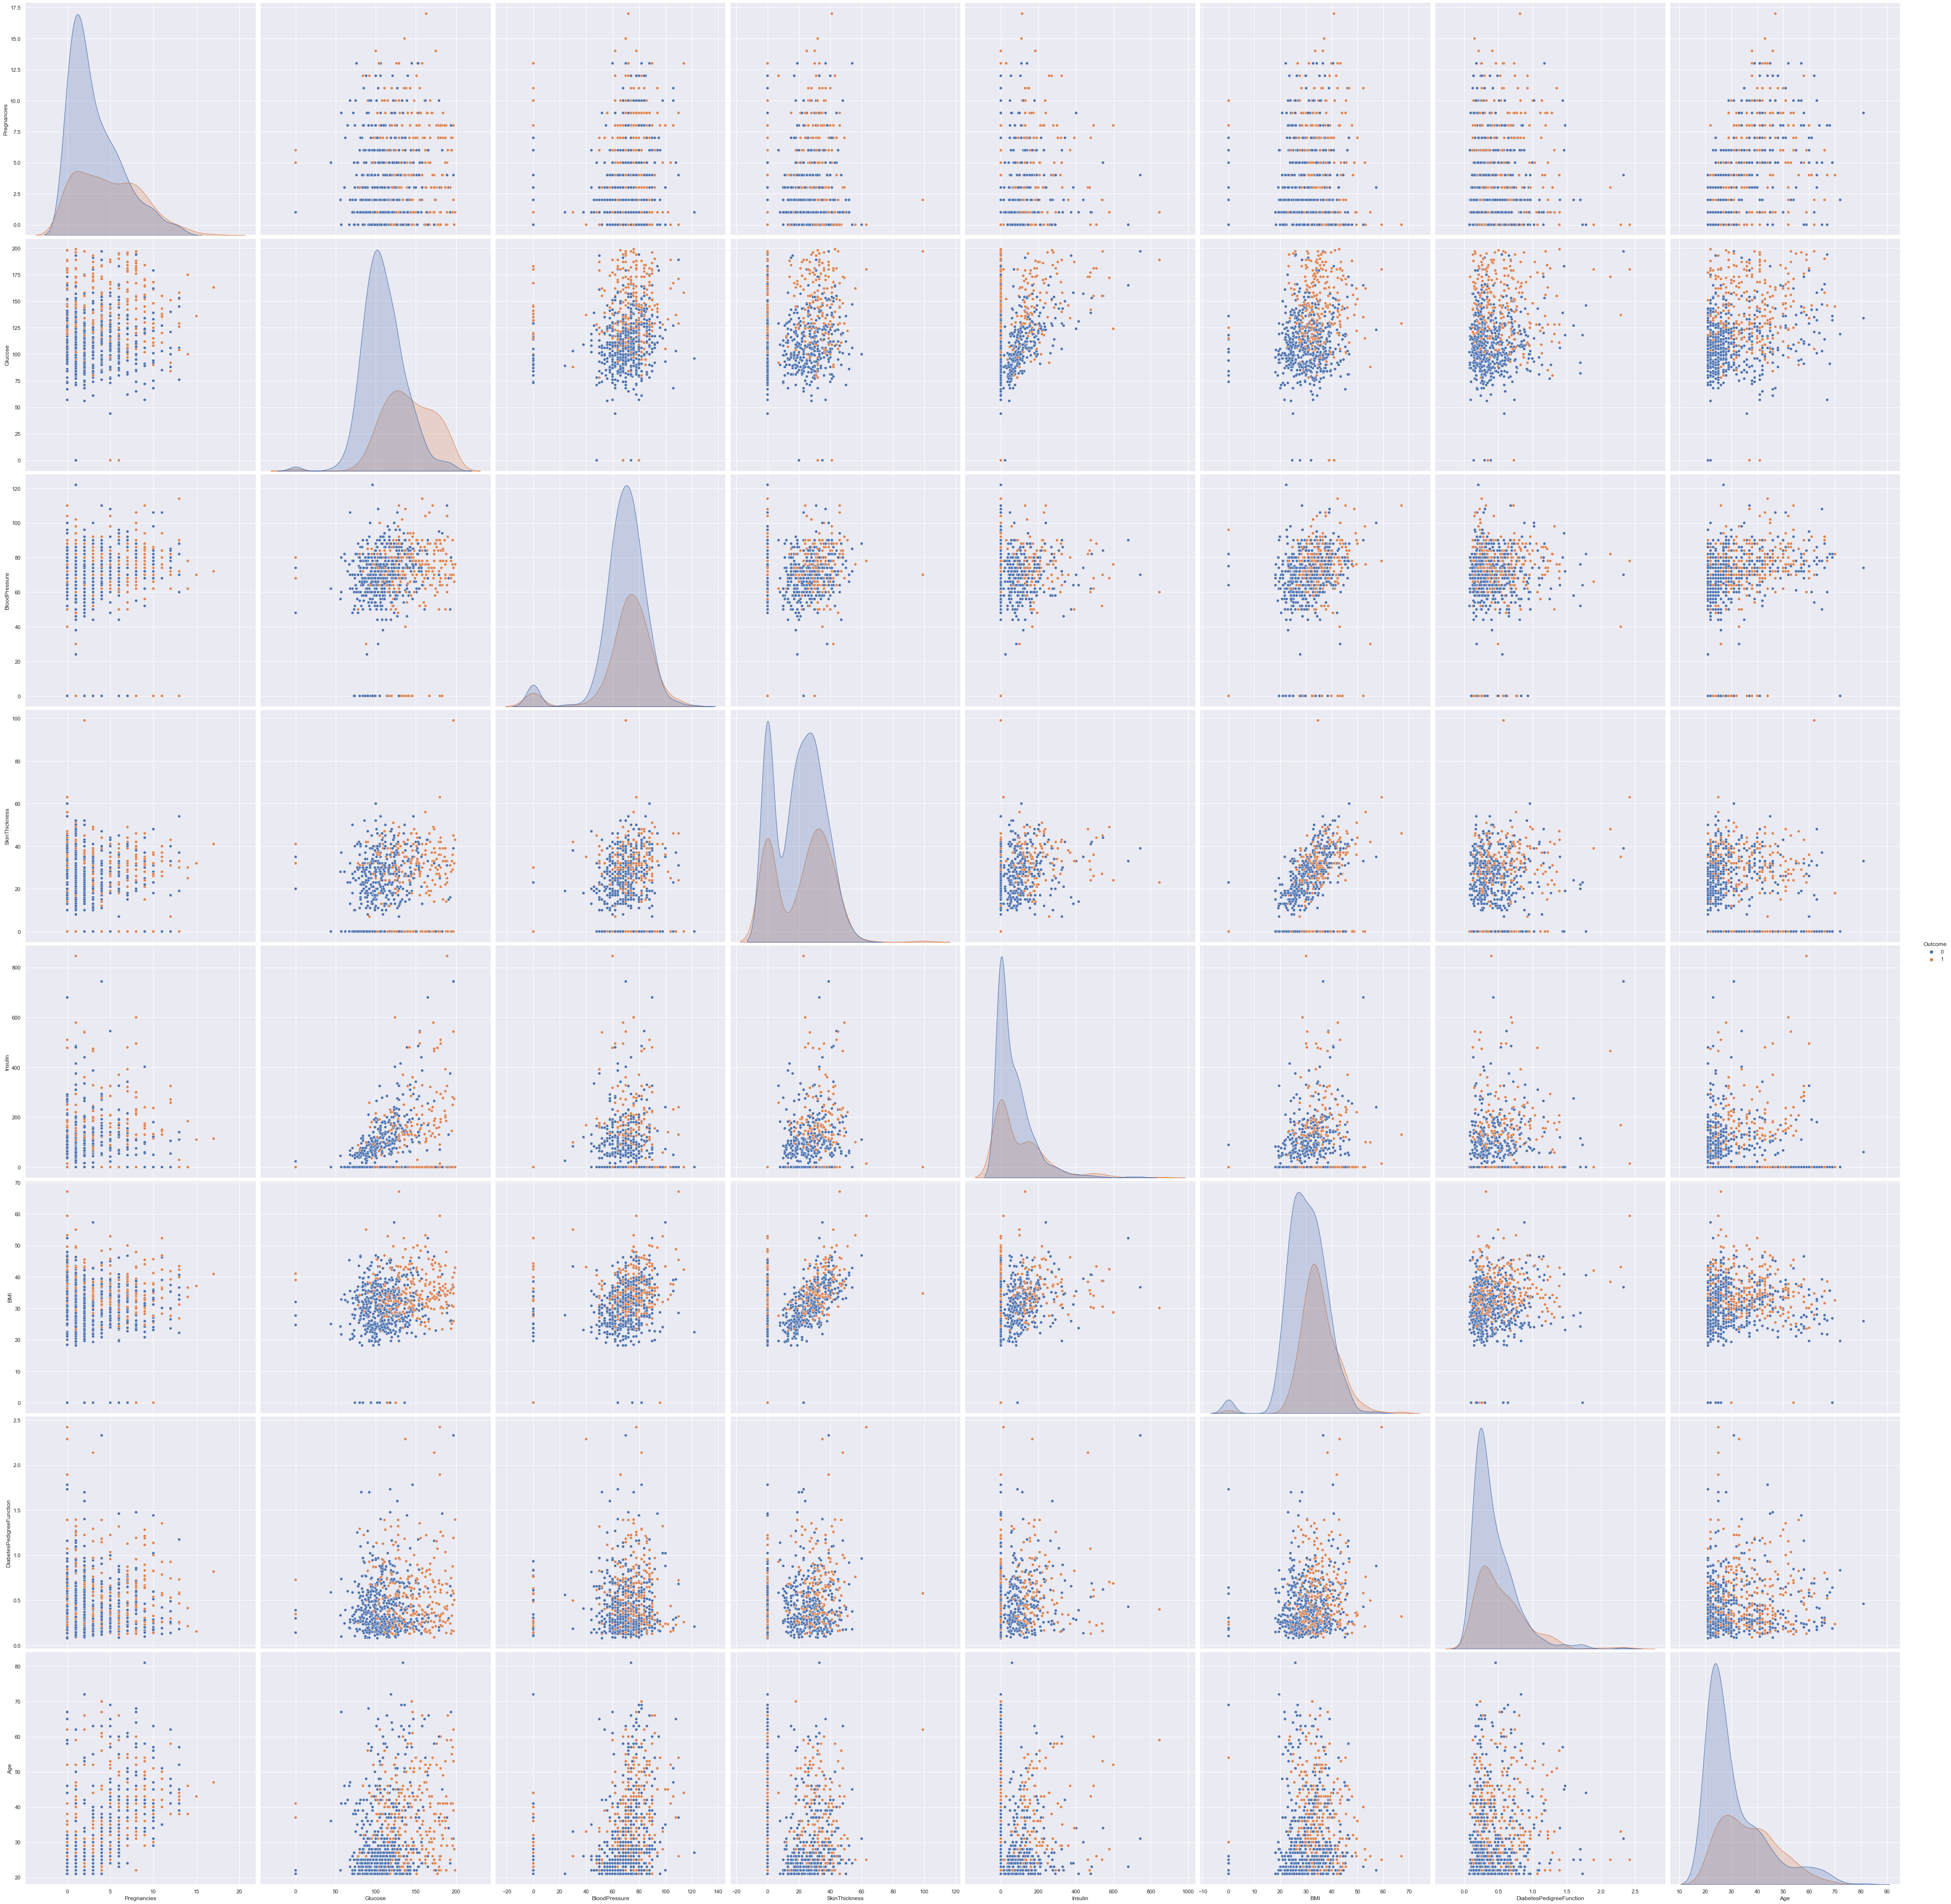

In [25]:
plt.figure(figsize=(20,20))
sns.set_theme(style="darkgrid")
sns.pairplot(df,hue ="Outcome", height=7)

### Correlation Map

<AxesSubplot:>

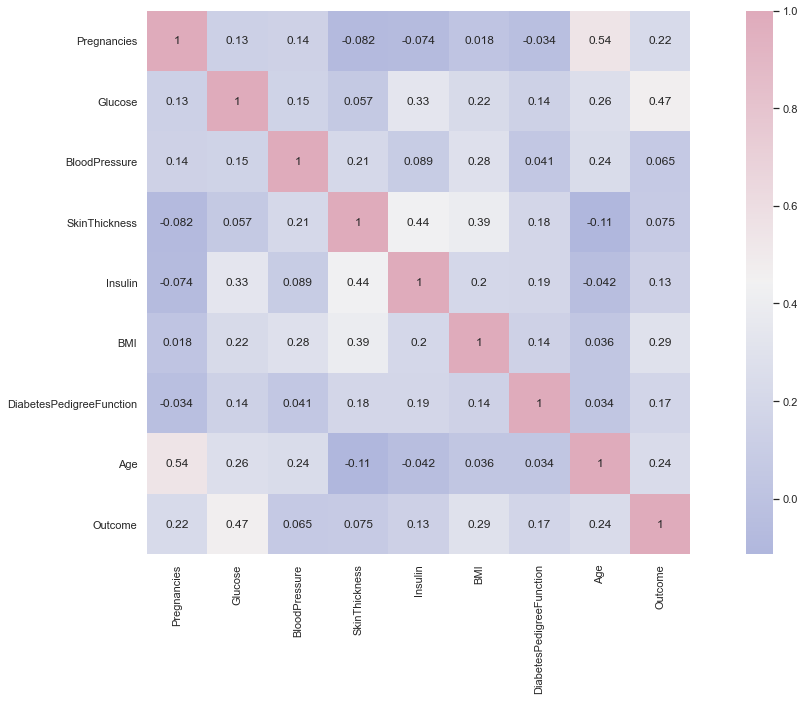

In [26]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,cmap= cmap, annot=True, square=True)

To overcome **Multi colinearity** dependent variables among the independent variables, adding those columns and updating dataframe by adding them.                                                       

In [27]:
df['AgeBP'] = df['Age'] + df['BloodPressure']
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  AgeBP  
0                       0.627   50        1    122  
1                       0.351   31        0     97  
2                       0.672   32        1     96  
3                       0.167   21        0     87  
4                       2.288   33        1     73  
..                        ...  ...      ...    ...  
763                     0.171   63        0    139  
764                     0.340   27        0     97  
765                     0.245   30        0    102  
766                     0.349   47        1    107  
767                     0.315   23        0     93  

[768 rows x 10 columns]

In [28]:
df['AgeGL'] = df['Age'] + df['Glucose']
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  AgeBP  AgeGL  
0                       0.627   50        1    122    198  
1                       0.351   31        0     97    116  
2                       0.672   32        1     96    215  
3                       0.167   21        0     87    110  
4                       2.288   33        1     73    170  
..                        ...  ...      ...    ...    ...  
763                     0.171   63        0    139    164  
764                     0.340   27        0     97    149  
765                     0.245   30        0    102    151  
766                     0.349   47        1    107    173  
767                     0.315   23        0     93    116  

[768 rows x 11 columns]

In [29]:
df['AgeTH'] = df['Age'] + df['SkinThickness']
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  AgeBP  AgeGL  AgeTH  
0                       0.627   50        1    122    198     85  
1                       0.351   31        0     97    116     60  
2                       0.672   32        1     96    215     32  
3                       0.167   21        0     87    110     44  
4                       2.288   33        1     73    170     68  
..                        ...  ...      ...    ...    ...    ...  
763                     0.171   63        0    139    164    111  
764                     0.340   27        0     97    149     54  
765                     0.245   30        0    102    151     53  
766                     0.349   47        1    107    173     47  
767                     0.315   23        0     93    116     54  

[768 rows x 12 columns]

#### Dropping unnecesary columns

In [30]:
df = df.drop(['Age', 'BloodPressure', 'SkinThickness', 'Glucose'], axis=1)
df

Pregnancies  Insulin   BMI  DiabetesPedigreeFunction  Outcome  AgeBP  \
0              6        0  33.6                     0.627        1    122   
1              1        0  26.6                     0.351        0     97   
2              8        0  23.3                     0.672        1     96   
3              1       94  28.1                     0.167        0     87   
4              0      168  43.1                     2.288        1     73   
..           ...      ...   ...                       ...      ...    ...   
763           10      180  32.9                     0.171        0    139   
764            2        0  36.8                     0.340        0     97   
765            5      112  26.2                     0.245        0    102   
766            1        0  30.1                     0.349        1    107   
767            1        0  30.4                     0.315        0     93   

     AgeGL  AgeTH  
0      198     85  
1      116     60  
2      215     32  
3      110     44  
4      170     68  
..     ...    ...  
763    164    111  
764    149     54  
765    151     53  
766    173     47  
767    116     54  

[768 rows x 8 columns]

## Outliers Detection 

no outliers

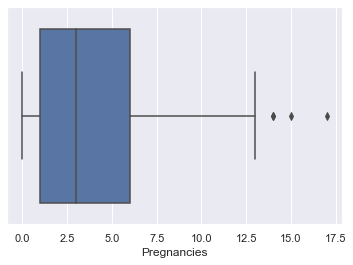

In [31]:
a1 = sns.boxplot(x=df['Pregnancies']) 

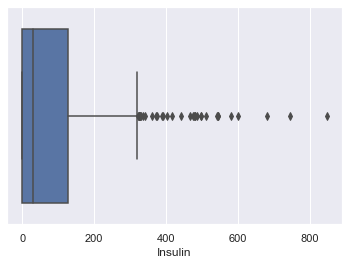

In [32]:
a4 = sns.boxplot(x=df['Insulin'])

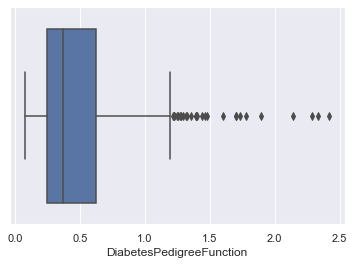

In [33]:
a5 = sns.boxplot(x=df['DiabetesPedigreeFunction'])

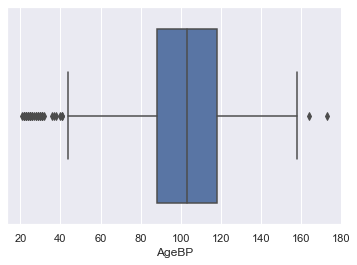

In [34]:
a6 = sns.boxplot(x=df['AgeBP'])

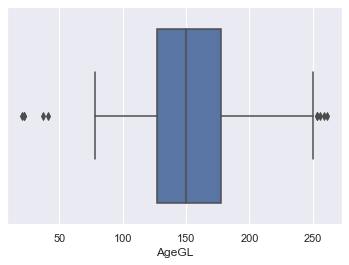

In [35]:
a7 = sns.boxplot(x=df['AgeGL'])

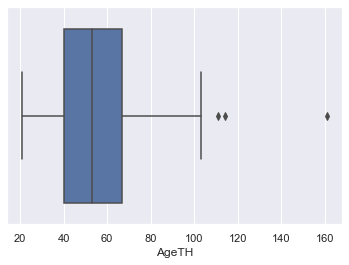

In [36]:
a8 = sns.boxplot(x=df['AgeTH'])

#### Recheck Correlation

<AxesSubplot:>

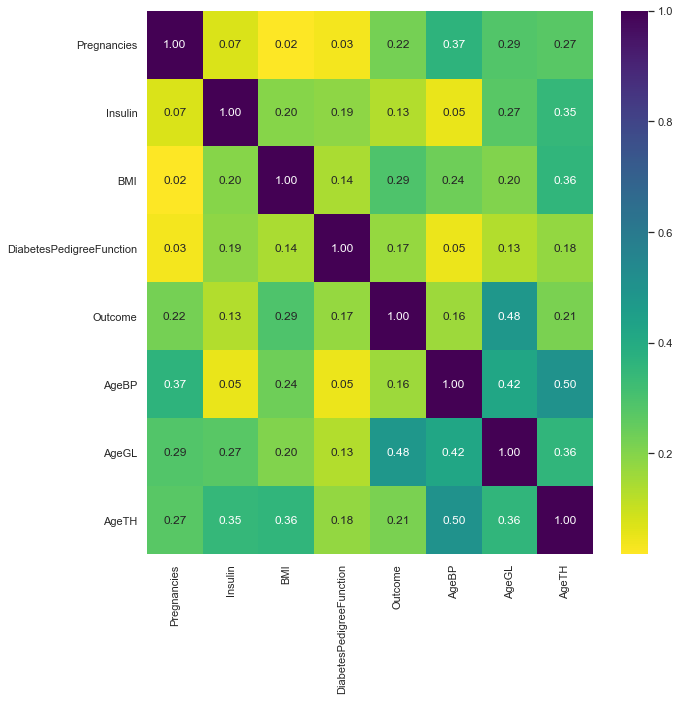

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df.corr()),annot=True,cmap='viridis_r',fmt="0.2f")

## Feature Engineering

In [38]:
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [39]:
X

Pregnancies  Insulin   BMI  DiabetesPedigreeFunction  AgeBP  AgeGL  AgeTH
0              6        0  33.6                     0.627    122    198     85
1              1        0  26.6                     0.351     97    116     60
2              8        0  23.3                     0.672     96    215     32
3              1       94  28.1                     0.167     87    110     44
4              0      168  43.1                     2.288     73    170     68
..           ...      ...   ...                       ...    ...    ...    ...
763           10      180  32.9                     0.171    139    164    111
764            2        0  36.8                     0.340     97    149     54
765            5      112  26.2                     0.245    102    151     53
766            1        0  30.1                     0.349    107    173     47
767            1        0  30.4                     0.315     93    116     54

[768 rows x 7 columns]

In [40]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Data Splitting

In [41]:
from sklearn.model_selection import train_test_split     #data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

### Feature Scaling : Standardization

In [42]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [43]:
df

Pregnancies  Insulin   BMI  DiabetesPedigreeFunction  Outcome  AgeBP  \
0              6        0  33.6                     0.627        1    122   
1              1        0  26.6                     0.351        0     97   
2              8        0  23.3                     0.672        1     96   
3              1       94  28.1                     0.167        0     87   
4              0      168  43.1                     2.288        1     73   
..           ...      ...   ...                       ...      ...    ...   
763           10      180  32.9                     0.171        0    139   
764            2        0  36.8                     0.340        0     97   
765            5      112  26.2                     0.245        0    102   
766            1        0  30.1                     0.349        1    107   
767            1        0  30.4                     0.315        0     93   

     AgeGL  AgeTH  
0      198     85  
1      116     60  
2      215     32  
3      110     44  
4      170     68  
..     ...    ...  
763    164    111  
764    149     54  
765    151     53  
766    173     47  
767    116     54  

[768 rows x 8 columns]

## Logistic Regression

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=21).fit(X_train, y_train)
lr.score(X_test, y_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train,lr.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,lr.predict(X_test))*100))

Train Set Accuracy:78.66449511400651
Test Set Accuracy:75.32467532467533


### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=150, max_depth=25, random_state=25)
RF.fit(X_train,y_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train,RF.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,RF.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:71.42857142857143


## Suport Vector Classifier

In [46]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,svm.predict(X_test))*100))

Train Set Accuracy:82.73615635179154
Test Set Accuracy:75.32467532467533


## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy',max_depth=25)
DTC.fit(X_train,y_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train,DTC.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,DTC.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:70.12987012987013


## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
GD=GradientBoostingClassifier(max_depth=15)
GD.fit(X_train,y_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train,GD.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,GD.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:68.18181818181817
